# Imports

In [1]:
# Import Basic libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
plt.style.use('seaborn')

In [2]:
# Import Data
Weekly_Case = pd.read_csv('Dataset\\data_table_for_weekly_case_trends__the_united_states.csv')
Weekly_Death = pd.read_csv('Dataset\\data_table_for_weekly_death_trends__the_united_states.csv')
Variant_Proportion = pd.read_csv('Dataset\\SARS-CoV-2_Variant_Proportions.csv')
Vaccinated_People = pd.read_csv('Dataset\\trends_in_number_of_covid19_vaccinations_in_the_us.csv')

# Data Visualization & Analysis

### Weekly Cases trend :: Numerical Variable

In [3]:
Variant_Proportion.drop(Variant_Proportion.loc[Variant_Proportion['usa_or_hhsregion']!='USA'].index, inplace=True)
#Look at only USA data 
#https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

Code from : https://www.geeksforgeeks.org/how-to-filter-dataframe-rows-based-on-the-date-in-pandas/

In [4]:
# Cleaning Of Weekly Cases
# Convert the date to datetime64
Weekly_Case['Date'] = pd.to_datetime(Weekly_Case['Date'], format='%b %d %Y')
  
# Filter data between two dates
filtered_Weekly_Case = Weekly_Case.loc[(Weekly_Case['Date'] >= '01 01 2022')
                     & (Weekly_Case['Date'] < '10 19 2022')]

#remove unecessary coulums
filtered_Weekly_Case=filtered_Weekly_Case.drop(["Historic Cases", "State"], axis=1)

# Display
filtered_Weekly_Case.head()

,Date,Weekly Cases
1,2022-10-12,265175
2,2022-10-05,309887
3,2022-09-28,342162
4,2022-09-21,395071
5,2022-09-14,471611


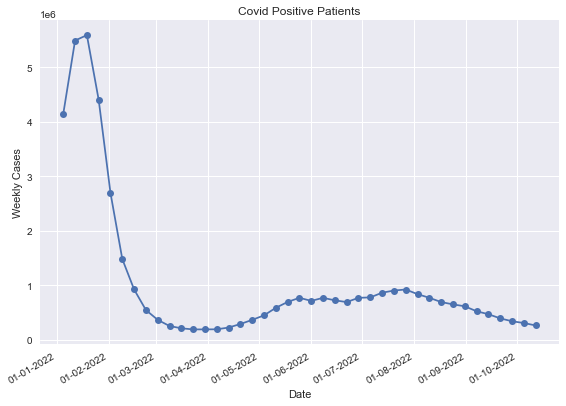

In [5]:
# https://saralgyaan.com/posts/plot-time-series-in-python-matplotlib-tutorial-chapter-8/
Weekly_Cases_Data = pd.DataFrame(filtered_Weekly_Case[['Weekly Cases','Date']])
Weekly_Cases_Data['Date'] = pd.to_datetime(Weekly_Cases_Data['Date'])
plt.plot_date(Weekly_Cases_Data['Date'],Weekly_Cases_Data['Weekly Cases'],  linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('Covid Positive Patients')
plt.xlabel('Date')
plt.ylabel('Weekly Cases')
plt.show()

<AxesSubplot:xlabel='Weekly Cases'>

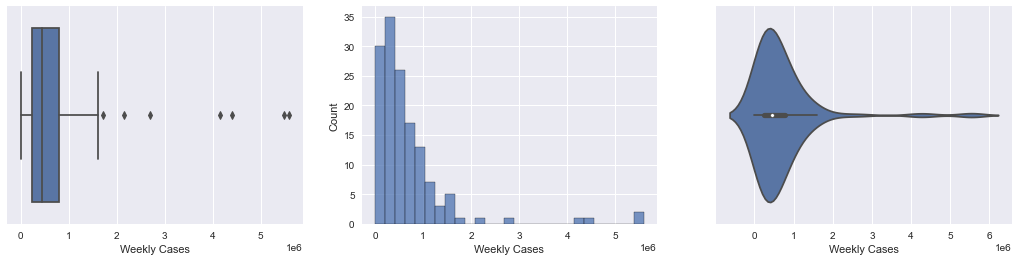

In [6]:
#visualization before data cleaning
f, axes = plt.subplots(1, 3, figsize=(18, 4))
sb.boxplot(data = Weekly_Case, x=Weekly_Case['Weekly Cases'], ax = axes[0])
sb.histplot(data = Weekly_Case, x=Weekly_Case['Weekly Cases'], ax = axes[1])
sb.violinplot(data = Weekly_Case, x=Weekly_Case['Weekly Cases'], ax = axes[2])

### Weekly Death :: Numerical Variable

In [7]:
# Cleaning Of Weekly Deaths
# Convert the date to datetime64
Weekly_Death['Date'] = pd.to_datetime(Weekly_Death['Date'], format='%b %d %Y')
  
# Filter data between two dates
filtered_Weekly_Death = Weekly_Death.loc[(Weekly_Death['Date'] >= '01 01 2022')
                     & (Weekly_Death['Date'] < '10 19 2022')]

#remove unecessary coulums
filtered_Weekly_Death=filtered_Weekly_Death.drop(["Historic Deaths", "State"], axis=1)

# Display
filtered_Weekly_Death.head()



,Date,Weekly Deaths
1,2022-10-12,2582
2,2022-10-05,2994
3,2022-09-28,2974
4,2022-09-21,3158
5,2022-09-14,3230


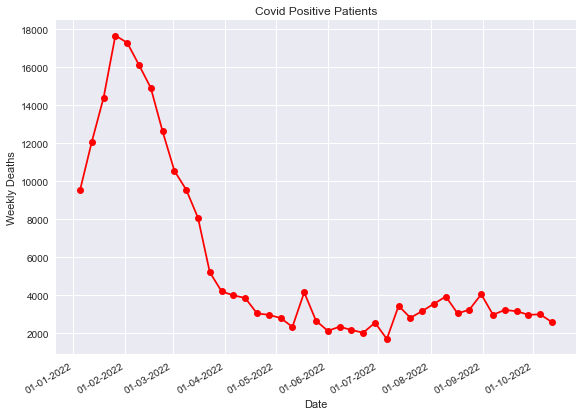

In [8]:
Weekly_Death_Data = pd.DataFrame(filtered_Weekly_Death[['Weekly Deaths','Date']])
Weekly_Death_Data['Date'] = pd.to_datetime(Weekly_Death_Data['Date'])
plt.plot_date(Weekly_Death_Data['Date'],Weekly_Death_Data['Weekly Deaths'],  linestyle='solid', color = 'Red')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('Covid Positive Patients')
plt.xlabel('Date')
plt.ylabel('Weekly Deaths')
plt.show()

<AxesSubplot:xlabel='Weekly Deaths'>

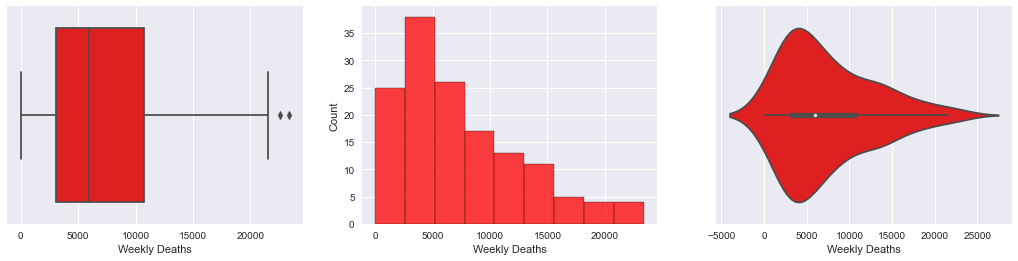

In [9]:
#visualization before data cleaning
f, axes = plt.subplots(1, 3, figsize=(18, 4))
sb.boxplot(data = Weekly_Death, x=Weekly_Death['Weekly Deaths'], ax = axes[0], color = 'Red')
sb.histplot(data = Weekly_Death, x=Weekly_Death['Weekly Deaths'], ax = axes[1], color = 'Red')
sb.violinplot(data = Weekly_Death, x=Weekly_Death['Weekly Deaths'], ax = axes[2], color = 'Red')

## SARS-COV Variant :: Categorical

In [10]:
# Cleaning Of Variant Proportions
# Convert the date to datetime64
Variant_Proportion['week_ending'] = pd.to_datetime(Variant_Proportion['week_ending'], format= '%m/%d/%Y %H:%M')
  
# Filter data between two dates
filtered_Variant_Proportion = Variant_Proportion.loc[(Variant_Proportion['week_ending'] >= '01 01 2022')
                     & (Variant_Proportion['week_ending'] < '10 23 2022')]

#remove unecessary coulums
filtered_Variant_Proportion = filtered_Variant_Proportion[["variant","week_ending","share"]]

# Display
filtered_Variant_Proportion.head()

,variant,week_ending,share
0,BA.4.6,2022-10-22,0.113205
1,BF.7,2022-10-22,0.066507
2,BQ.1,2022-10-22,0.093988
3,BA.2.75,2022-10-22,0.015594
4,BQ.1.1,2022-10-22,0.071613


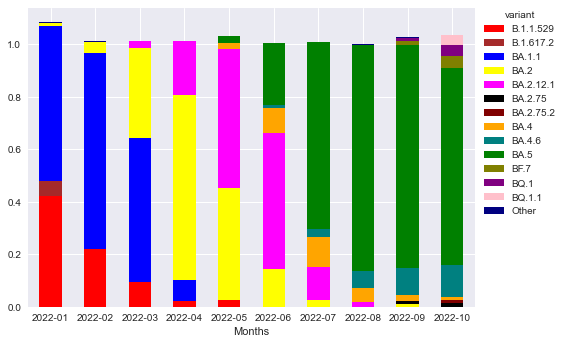

In [11]:
import warnings
warnings.filterwarnings("ignore")

filtered_Variant_Proportion.week_ending = pd.to_datetime(filtered_Variant_Proportion.week_ending)
filtered_Variant_Proportion.month = filtered_Variant_Proportion.week_ending.dt.to_period('M')

# change the insignificant values to Other
filtered_Variant_Proportion.loc[(filtered_Variant_Proportion['share'] < 0.01), "variant"] = "Other"
crosstab = pd.crosstab(filtered_Variant_Proportion.month, filtered_Variant_Proportion.variant, values = filtered_Variant_Proportion.share, aggfunc = np.mean)

color = ['Red','Brown','Blue','Yellow','Magenta','Black','Maroon','Orange','Teal','Green','Olive','Purple','Pink','Navy']
crosstabplot = crosstab.plot(kind='bar', rot=0, stacked = True, xlabel = 'Months', color = color)
crosstabplot.legend(title='variant', bbox_to_anchor=(1, 1.02),loc='upper left')

## Vaccinated People :: Numerical

In [12]:
# Cleaning Of Variant Proportions
# Convert the date to datetime64
Vaccinated_People['Date'] = pd.to_datetime(Vaccinated_People['Date'], format= '%m/%d/%Y')
  
# Filter data between two dates
filtered_Vaccinated_People = Vaccinated_People.loc[(Vaccinated_People['Date'] >= '01 05 2022')
                     & (Vaccinated_People['Date'] <= '10 19 2022')]

filtered_Vaccinated_People = filtered_Vaccinated_People.iloc[::7, :]

#remove unecessary coulums
filtered_Vaccinated_People = filtered_Vaccinated_People.iloc[:, [0, 5, 6, 7, 8, 12, 24]].reset_index(drop = True)

#rename the colnames
filtered_Vaccinated_People.rename(columns={ 'Percent of Total Pop with at least One Dose': 'PercentOneDose', \
                                            'Percent of People with Complete Primary Series': 'PercentCompleted', \
                                            'Percent of People with a Completed Primary Series who have a First Booster Dose': 'PercentFirstBooster', \
                                            'People Receiving 1 or More Doses Cumulative': 'PeopleOneOrMore', \
                                            'Percent of People Ages 50+ with First Booster Dose who Received Second Booster Dose': 'PercentSeniorBooster' \
                                          }, inplace = True)

#display
filtered_Vaccinated_People.head()

,Date,PercentOneDose,PercentCompleted,PercentFirstBooster,Administered,PeopleOneOrMore,PercentSeniorBooster
0,2022-10-18,80.0,68.2,49.1,632905664,265591330,40.6
1,2022-10-11,79.9,68.2,49.1,630145435,265329365,39.6
2,2022-10-04,79.8,68.1,48.9,626055729,264942526,38.3
3,2022-09-27,79.7,68.0,48.8,622068616,264564363,37.1
4,2022-09-20,79.6,67.9,48.7,618116882,264176559,36.0


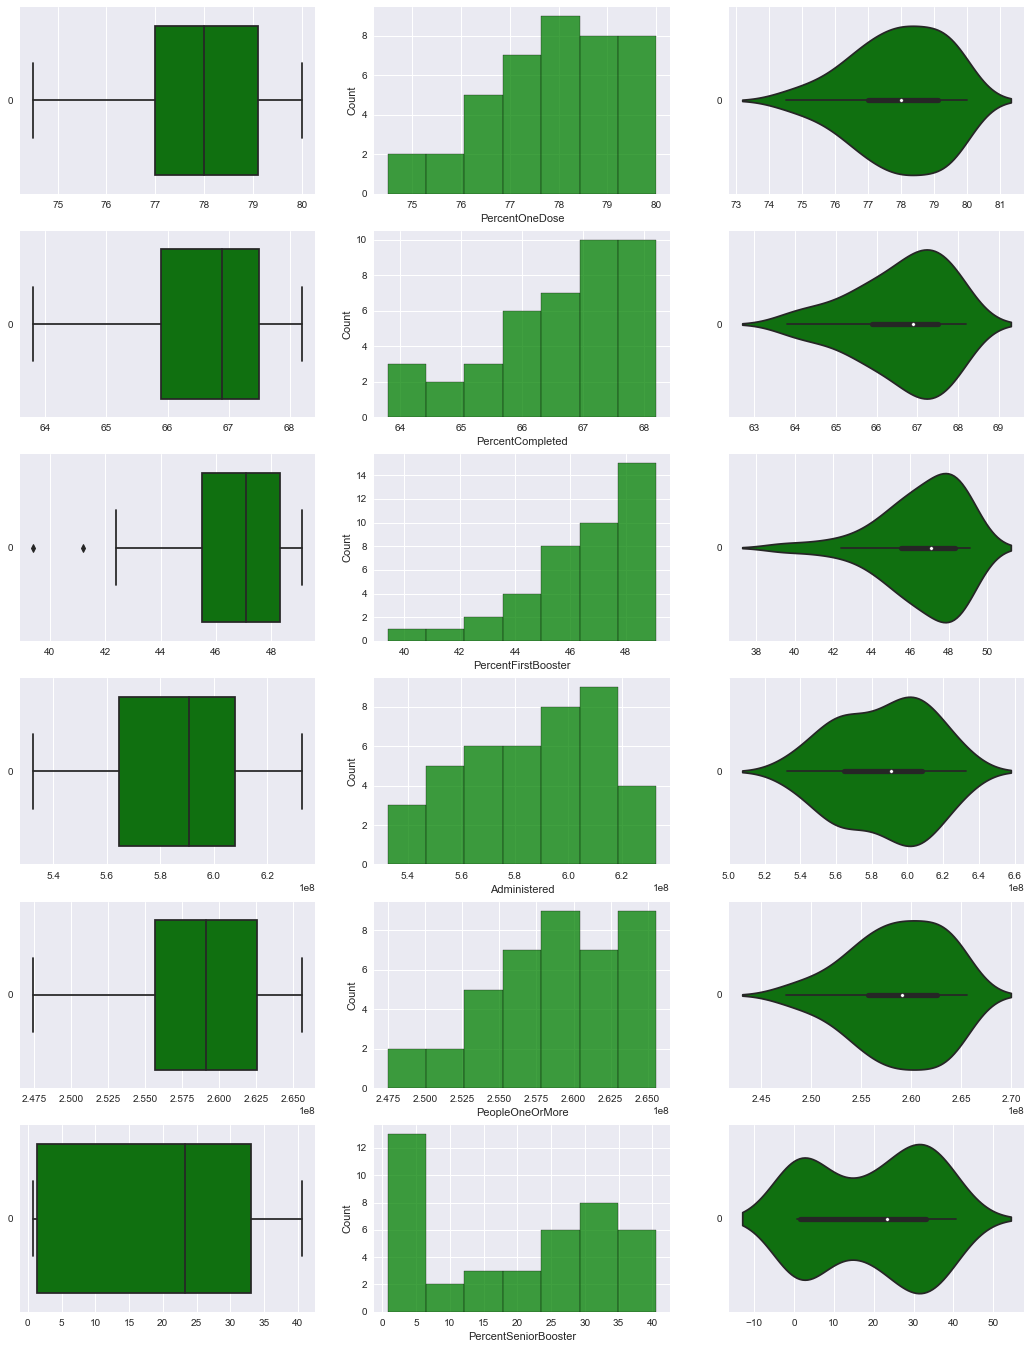

In [13]:
#visualization
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in filtered_Vaccinated_People:
    if(var == 'Date'):
        continue
    sb.boxplot(data = filtered_Vaccinated_People[var], orient = "h", ax = axes[count,0], color = 'Green')
    sb.histplot(data = filtered_Vaccinated_People[var], ax = axes[count,1], color = 'Green')
    sb.violinplot(data = filtered_Vaccinated_People[var], orient = "h", ax = axes[count,2], color = 'Green')
    count += 1

## Merging DataSet for Analysis

In [14]:
AscendingVariant = filtered_Variant_Proportion.sort_values(by=['week_ending'], ascending=True)
VariantWeek = pd.crosstab(filtered_Variant_Proportion.week_ending, filtered_Variant_Proportion.variant,values=filtered_Variant_Proportion.share.round(2), aggfunc = 'mean')

VariantWeek =  VariantWeek.reset_index()

AscendingVaccination = filtered_Vaccinated_People.sort_values(by='Date', ascending = True)

AscendingVaccination = AscendingVaccination.reset_index()

In [15]:
WeekDeath = pd.concat([filtered_Weekly_Death,filtered_Weekly_Case.drop('Date',axis=1)],axis=1)
WeekDeath = WeekDeath.sort_values(by=['Date'], ascending=True)
WeekDeath = WeekDeath.reset_index()
VariantWeek = VariantWeek.fillna(0)
WeekDeathVar = pd.concat([WeekDeath.drop(columns=WeekDeath.columns[0], axis=1),VariantWeek.drop(columns=VariantWeek.columns[0:1], axis=1)],axis=1)

FinalDF = pd.concat([WeekDeathVar,AscendingVaccination.drop(columns=AscendingVaccination.columns[0:2],axis = 1)], axis=1)

FinalDF = FinalDF.drop([41,42])

FinalDF.head()

,Date,Weekly Deaths,Weekly Cases,B.1.1.529,B.1.617.2,BA.1.1,BA.2,BA.2.12.1,BA.2.75,BA.2.75.2,...,BF.7,BQ.1,BQ.1.1,Other,PercentOneDose,PercentCompleted,PercentFirstBooster,Administered,PeopleOneOrMore,PercentSeniorBooster
0,2022-01-05,9523.0,4144938.0,0.501905,0.098571,0.451111,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.003128,74.5,63.8,39.4,532523597.0,247456745.0,0.8
1,2022-01-12,12076.0,5489860.0,0.486341,0.042927,0.530278,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000955,75.1,64.1,41.2,539630858.0,249319876.0,0.8
2,2022-01-19,14401.0,5589403.0,0.420488,0.020000,0.618649,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000055,75.5,64.4,42.4,545207423.0,250756791.0,0.9
3,2022-01-26,17675.0,4401234.0,0.375750,0.000000,0.660811,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.001735,75.9,64.7,43.3,549748283.0,251888888.0,0.9
4,2022-02-02,17299.0,2692886.0,0.324615,0.000000,0.697027,0.01,0.0,0.0,0.0,...,0.0,0.0,0.0,0.003333,76.1,65.0,43.8,553157166.0,252744602.0,1.0


In [16]:
FinalDF.corr()

,Weekly Deaths,Weekly Cases,B.1.1.529,B.1.617.2,BA.1.1,BA.2,BA.2.12.1,BA.2.75,BA.2.75.2,BA.4,...,BF.7,BQ.1,BQ.1.1,Other,PercentOneDose,PercentCompleted,PercentFirstBooster,Administered,PeopleOneOrMore,PercentSeniorBooster
Weekly Deaths,1.000000,0.634516,0.866097,0.253415,0.912826,-0.300634,-0.455386,-0.197360,-0.106507,-0.455653,...,-0.203644,-0.163139,-0.138109,0.223036,-0.766723,-0.811890,-0.768335,-0.763972,-0.765028,-0.758137
Weekly Cases,0.634516,1.000000,0.865079,0.637301,0.434783,-0.338025,-0.201337,-0.175702,-0.092120,-0.155861,...,-0.179975,-0.145396,-0.122481,0.271580,-0.654955,-0.702996,-0.741007,-0.586347,-0.655077,-0.425266
B.1.1.529,0.866097,0.865079,1.000000,0.660607,0.783852,-0.292457,-0.350698,-0.192327,-0.093392,-0.420993,...,-0.197846,-0.152792,-0.126571,0.298511,-0.864114,-0.902615,-0.925604,-0.818452,-0.862089,-0.727752
B.1.617.2,0.253415,0.637301,0.660607,1.000000,0.228868,-0.171414,-0.164758,-0.077178,-0.037477,-0.172841,...,-0.079393,-0.061314,-0.050791,0.358869,-0.542992,-0.554215,-0.678455,-0.466683,-0.541800,-0.309056
BA.1.1,0.912826,0.434783,0.783852,0.228868,1.000000,-0.161150,-0.458519,-0.228637,-0.111024,-0.512031,...,-0.235198,-0.181639,-0.150467,0.069030,-0.802133,-0.827290,-0.774067,-0.823834,-0.799199,-0.875274
BA.2,-0.300634,-0.338025,-0.292457,-0.171414,-0.161150,1.000000,0.413863,-0.235477,-0.114346,-0.343494,...,-0.241152,-0.187073,-0.154968,-0.144258,-0.148695,-0.074790,-0.044738,-0.196979,-0.155352,-0.272458
BA.2.12.1,-0.455386,-0.201337,-0.350698,-0.164758,-0.458519,0.413863,1.000000,-0.226333,-0.109905,0.291341,...,-0.232828,-0.179808,-0.148950,-0.244346,0.103685,0.181145,0.197687,0.126220,0.102784,0.185275
BA.2.75,-0.197360,-0.175702,-0.192327,-0.077178,-0.228637,-0.235477,-0.226333,1.000000,0.598002,-0.170042,...,0.960044,0.845525,0.737098,0.191350,0.459089,0.429485,0.360423,0.515637,0.461750,0.442358
BA.2.75.2,-0.106507,-0.092120,-0.093392,-0.037477,-0.111024,-0.114346,-0.109905,0.598002,1.000000,-0.115297,...,0.709964,0.797563,0.892214,0.177451,0.238884,0.218139,0.183309,0.279134,0.239825,0.232090
BA.4,-0.455653,-0.155861,-0.420993,-0.172841,-0.512031,-0.343494,0.291341,-0.170042,-0.115297,1.000000,...,-0.174654,-0.159628,-0.140242,-0.233534,0.462726,0.467146,0.480815,0.470145,0.464743,0.560666


<AxesSubplot:>

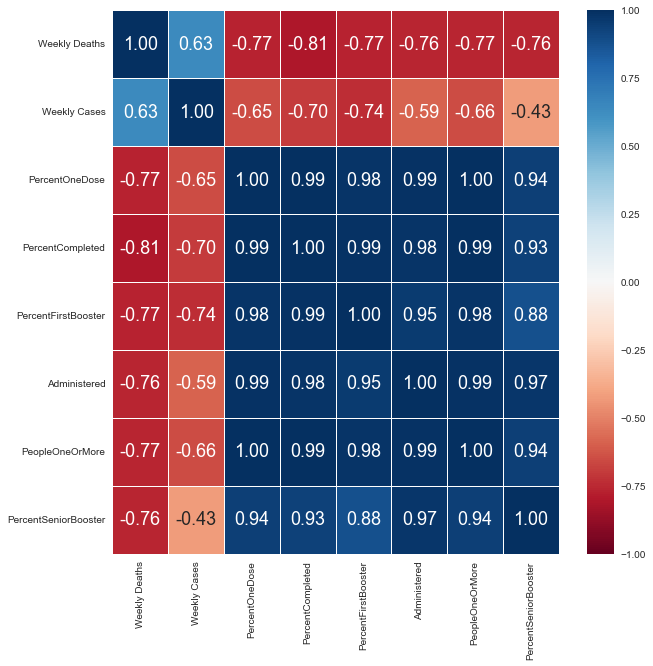

In [17]:
WeekDeathVac = pd.concat([WeekDeath.drop(columns=WeekDeath.columns[0], axis=1), \
                          AscendingVaccination.drop(columns=AscendingVaccination.columns[0:2], axis=1)],axis=1)

# WeekDeathVac = WeekDeathVac.drop(41)

# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(10,10))
sb.heatmap(WeekDeathVac.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [18]:
WeekDeathVac = WeekDeathVac.reset_index()
#drop date column
WeekDeathVac = WeekDeathVac.drop(columns=WeekDeathVac.columns[0:2])

In [19]:
WeekDeathVac.head()

,Weekly Deaths,Weekly Cases,PercentOneDose,PercentCompleted,PercentFirstBooster,Administered,PeopleOneOrMore,PercentSeniorBooster
0,9523,4144938,74.5,63.8,39.4,532523597,247456745,0.8
1,12076,5489860,75.1,64.1,41.2,539630858,249319876,0.8
2,14401,5589403,75.5,64.4,42.4,545207423,250756791,0.9
3,17675,4401234,75.9,64.7,43.3,549748283,251888888,0.9
4,17299,2692886,76.1,65.0,43.8,553157166,252744602,1.0


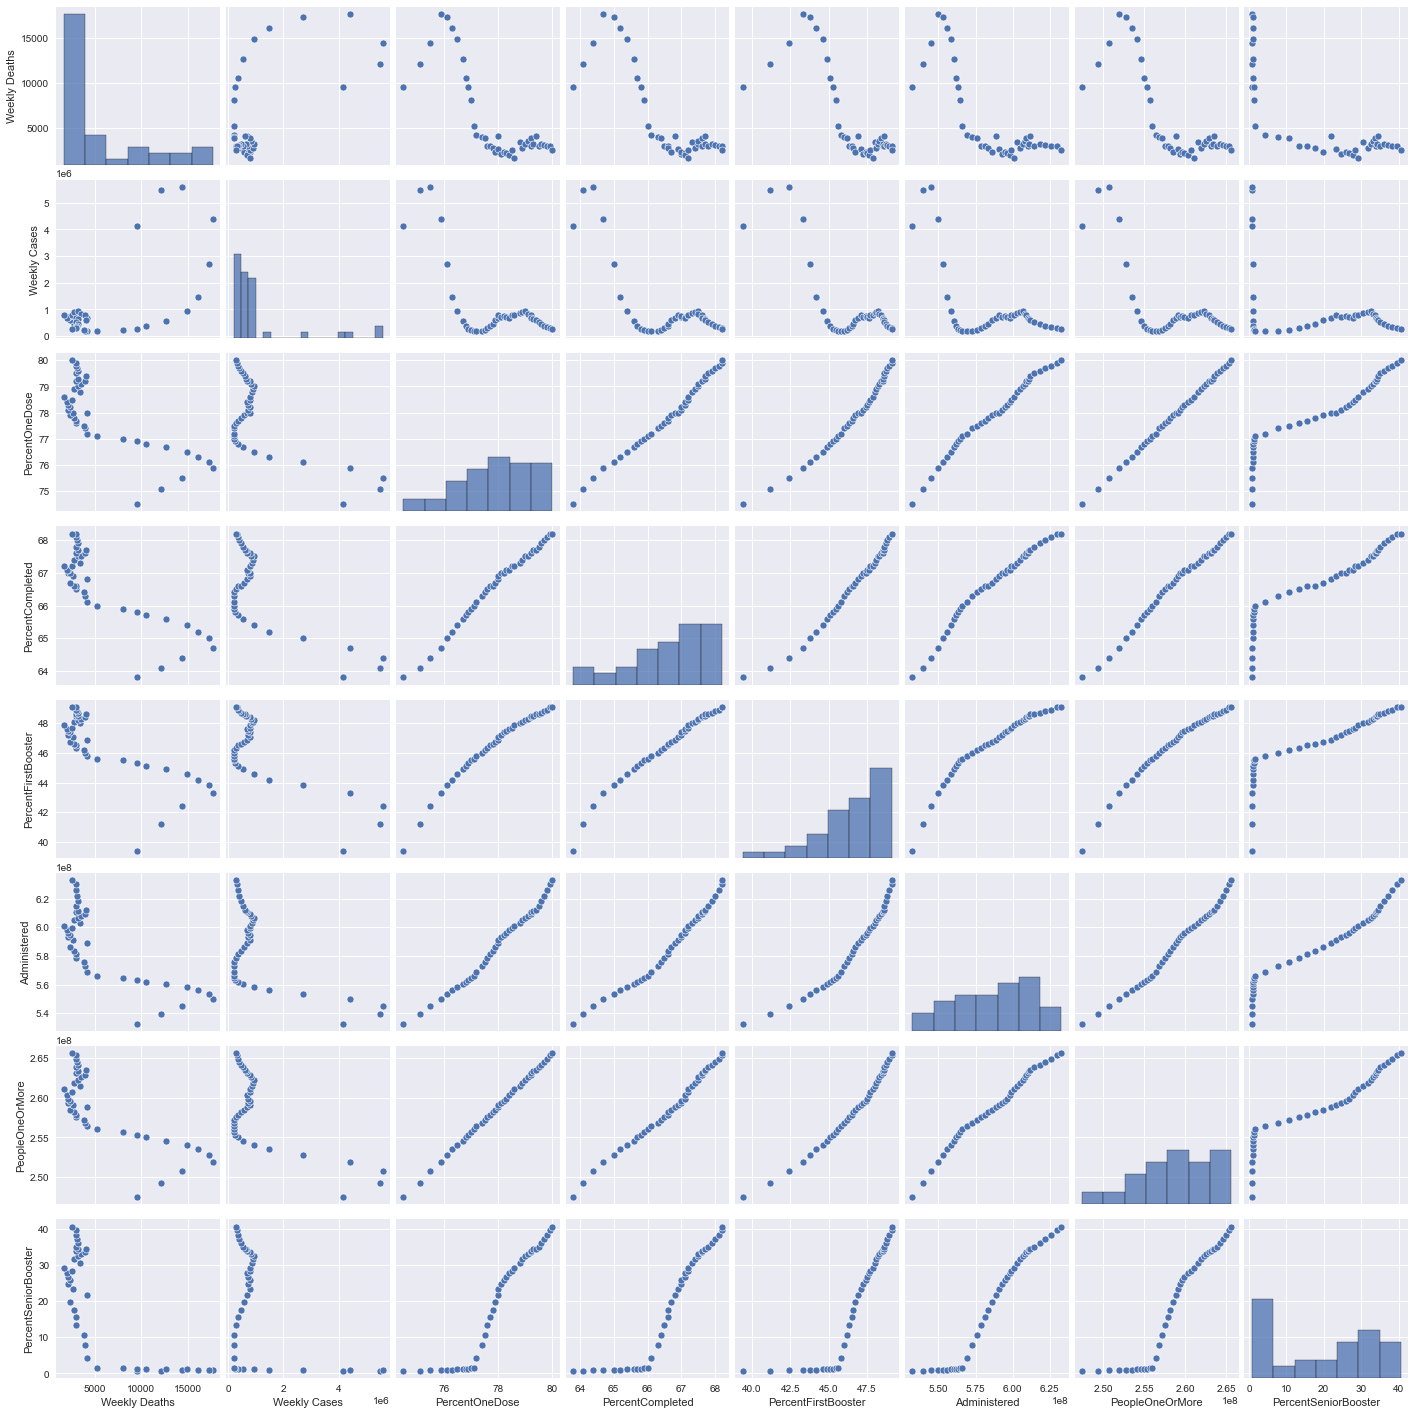

In [20]:
# Plot the Raw Data on 2D grids
sb.pairplot(WeekDeathVac)

In [21]:
# # write to a new csv file with cleaned data
# WeekDeathVac.to_csv('Week_Death_Vac.csv', index=False)
# filtered_Variant_Proportion.to_csv('Variants.csv', index=False)